In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import h5py
import PIL
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Conv2DTranspose,Conv2D,Conv2DTranspose,BatchNormalization,Input,ReLU,Add,Lambda,LeakyReLU,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow import Tensor
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import random

from importlib import reload 
from monk import Dataset
   
from PIL import Image 
import PIL 
  


In [3]:
import ncut_loss
import build_Unet
import build_Wnet
import getData

# DATA

In [4]:
#dataset_parts = Dataset.from_coco('/home/ubuntu/shared/data/meta/annotations/gold_standard/2021-06/parts_2021-06_train.json')
to_keep = ["bumper_back","bumper_front","door_back_left","door_back_right","door_front_left",    
"door_front_right","fender_back_left","fender_back_right","fender_front_left","fender_front_right"]    
#dataset_filtered = dataset_parts.filter_images_with_cats(keep=to_keep).filter_cats(keep=to_keep)



In [41]:
path = '/home/ubuntu/shared/data/meta/annotations/gold_standard/2021-06/parts_2021-06_train.json'
gen = getData.get_generator(path,128,1,to_keep)

Importing from COCO JSON:   8%|7         | 894/11876 [00:01<00:12, 893.52it/s]

In [7]:
def rescale(image):
    return( (((image+1)/2)*255 ).astype("uint8") )

InvalidArgumentError: slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

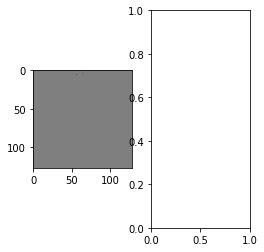

In [8]:
items = gen.__getitem__(100)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(rescale(items[0].numpy()))
plt.subplot(1,3,2)
plt.imshow(rescale(items[1].numpy()))
plt.subplot(1,3,3)
plt.imshow(rescale(items[2].numpy()))


In [46]:
img_crop = gen.__getitem__(0)

In [47]:
img_crop

<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[-0.7254902 , -0.73333335, -0.7490196 ],
         [-0.7254902 , -0.73333335, -0.7490196 ],
         [-0.70980394, -0.7176471 , -0.73333335],
         ...,
         [ 0.21568628,  0.25490198,  0.2627451 ],
         [ 0.20784314,  0.23921569,  0.24705882],
         [ 0.16862746,  0.2       ,  0.20784314]],

        [[-0.6313726 , -0.67058825, -0.69411767],
         [-0.654902  , -0.6862745 , -0.7019608 ],
         [-0.7019608 , -0.70980394, -0.7254902 ],
         ...,
         [ 0.2       ,  0.22352941,  0.2627451 ],
         [ 0.16862746,  0.19215687,  0.23137255],
         [ 0.15294118,  0.18431373,  0.21568628]],

        [[-0.5686275 , -0.60784316, -0.6313726 ],
         [-0.5921569 , -0.62352943, -0.64705884],
         [-0.654902  , -0.6627451 , -0.6784314 ],
         ...,
         [ 0.18431373,  0.20784314,  0.24705882],
         [ 0.16078432,  0.18431373,  0.22352941],
         [ 0.15294118,  0.1764706 ,  0.2156862

In [33]:
(items[0]/255)*2-1

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[-0.19215685, -0.52156866, -0.8352941 ],
        [-0.16862744, -0.78039217, -0.8901961 ],
        [-0.08235294, -0.8509804 , -0.92156863],
        ...,
        [-0.1607843 , -0.2862745 , -0.6313726 ],
        [-0.24705881, -0.41176468, -0.7490196 ],
        [-0.2862745 , -0.45098037, -0.7882353 ]],

       [[-0.2862745 , -0.6627451 , -0.92156863],
        [-0.0745098 , -0.78039217, -0.8666667 ],
        [ 0.03529418, -0.84313726, -0.8901961 ],
        ...,
        [-0.11372548, -0.23921567, -0.5137255 ],
        [-0.19215685, -0.3333333 , -0.69411767],
        [-0.16862744, -0.3333333 , -0.67058825]],

       [[-0.24705881, -0.6627451 , -0.8666667 ],
        [-0.04313725, -0.8117647 , -0.8901961 ],
        [ 0.12941182, -0.81960785, -0.85882354],
        ...,
        [-0.08235294, -0.19215685, -0.4352941 ],
        [-0.1607843 , -0.30196077, -0.654902  ],
        [-0.05098039, -0.21568626, -0.5529412 ]],

       ...,

     

In [16]:
n

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

# MODEL

In [ ]:
neighbor_filter=ncut_loss.neighbor_filter((128,128))

In [ ]:
encoder = build_Unet.build_Unet(K=15,stages = [1,2,3,4],filters = 64,type='encoder',input_size=128)
decoder = build_Unet.build_Unet(K=15,stages = [1,2,3,4],filters = 64,type='decoder',input_size=128)
wn = build_Wnet.Wnet(encoder,decoder,(128,128))

def custom_loss(y_true, y_pred):
    return K.mean(y_true - y_pred)**2

# Compile the model
wn.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.003),
    loss_fn_segmentation = ncut_loss.compute_soft_ncuts,
    loss_fn_reconstruction = tf.keras.losses.MeanSquaredError()
)


In [ ]:
wn.save_weights('ckpt2')

In [ ]:
def visualise_seg(image,encoder):
    image = tf.expand_dims(image, 0)
    seg = encoder(image)
    ag = tf.math.argmax(seg, axis=-1, output_type=tf.dtypes.int64)
    loss = ncut_loss.compute_soft_ncuts(image,seg,neighbor_filter)
    res = wn(image).numpy()[0]
    res = rescale(res)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(ag[0])
    plt.subplot(1,2,2)
    plt.imshow(res)
    print(loss)

In [ ]:
visualise_seg(gen.__getitem__(300)[0],wn.encoder)


In [ ]:
seg = encoder(image_ref)
ag = tf.math.argmax(seg, axis=-1, output_type=tf.dtypes.int64)[0]
ag = ag.numpy()
ag = ag *255 /ag.max()
print(ag.shape)
plt.imshow(ag)

In [ ]:
seg = encoder(image_ref)
ag = tf.math.argmax(seg, axis=-1, output_type=tf.dtypes.int64)[0]
ag = ag.numpy()
ag = ag *255 /ag.max()
print(ag.shape)
plt.imshow(ag)

In [ ]:
def set_learning_rate(step_counter,model,base_lr):
    if(step_counter>=1000):
        new_lr = base_lr/(10**(step_counter//1000))
    else:
        new_lr = base_lr
    model.optimizer.lr = new_lr
    
def training(model,train_dataset,epochs,start_epoch,base_lr,ckpt_freq,ckpt_dir_path,log_dir_path,img_dir_path,image_ref):
  
    step_counter=0
    writer = tf.summary.create_file_writer(log_dir_path)
    
    print(epochs)
    print(start_epoch)
    
    for epoch in range(start_epoch,epochs):
        set_learning_rate(epoch,model,base_lr)

        print("\nStart of epoch %d" % (epoch,))
        print("Learning rate" +str(model.optimizer.lr))



        ##TRAIN
        total_train_loss_encoder = []
        total_train_loss_decoder = []

        for step, x_batch_train in enumerate(train_dataset):
            step_counter+=1
            set_learning_rate(step_counter,model,base_lr)

            train_losses = model.train_step(x_batch_train)

            train_losses_encoder=train_losses["loss_encoder"]
            train_losses_decoder=train_losses["loss_decoder"]

            total_train_loss_encoder.append(train_losses_encoder.numpy())
            total_train_loss_decoder.append(train_losses_decoder.numpy())

            if step_counter%ckpt_freq ==0:
                ckpt_name="ckpt"+str(step_counter)
                model.save_weights(ckpt_dir_path)
            if step_counter%1==0:
                print("step "+str(step) ) 
                print('enc loss ',train_losses_encoder)
                print('dec loss ' ,train_losses_decoder)

            if step_counter%50==0:
                res = model(image_ref).numpy()[0]
                res = rescale(res)
                Image.fromarray(res).save(img_dir_path+"/reconstruction_step"+ str(step_counter)+"_.png")

                seg = model.encoder(image_ref)
                ag = tf.math.argmax(seg, axis=-1, output_type=tf.dtypes.int64)[0]
                ag = ag.numpy()
                ag = ag *255 /ag.max()
                Image.fromarray(ag).convert("L").save(img_dir_path+"/segmentation_step"+ str(step_counter)+"_.png")


        final_train_loss_decoder = np.mean(np.array(total_train_loss_decoder))
        final_train_loss_encoder = np.mean(np.array(total_train_loss_encoder))

        print("TRAIN LOSS ENCODER : ", final_train_loss_encoder)
        print("TRAIN LOSS DECODER : ", final_train_loss_decoder)



     ##TEST
    """
    print('START TEST')

    total_test_loss_encoder = []
    total_test_loss_decoder = []

    for _, x_batch_test in enumerate(test_dataset):

        test_losses = model.test_step(x_batch_test)
        test_losses_encoder=test_losses["loss_encoder"]
        test_losses_decoder=test_losses["loss_decoder"]

        total_test_loss_encoder.append(test_losses_encoder)
        total_test_loss_decoder.append(test_losses_decoder)

    final_test_loss_decoder = np.mean(np.array(total_test_loss_decoder.numpy()))
    final_test_loss_encoder = np.mean(np.array(total_test_loss_encoder.numpy()))

    print("TEST LOSS ENCODER : ", final_test_loss_encoder)
    print("TEST LOSS DECODER : ", final_test_loss_decoder)

    """
    with writer.as_default():
        tf.summary.scalar('training loss encoder', final_train_loss_encoder, step=epoch)
        tf.summary.scalar('training loss decoder', final_train_loss_decoder, step=epoch)
        tf.summary.scalar('training loss', final_train_loss_encoder+final_train_loss_decoder, step=epoch)

        tf.summary.scalar('test loss encoder', final_test_loss_encoder, step=epoch)
        tf.summary.scalar('test loss decoder', final_test_loss_decoder, step=epoch)
        tf.summary.scalar('test loss', final_test_loss_decoder+final_test_loss_encoder, step=epoch)
    


In [ ]:
epochs=5000
base_lr=0.01
ckpt_freq=1000
start_epoch=0
ckpt_dir_path = 'wnet1/cpkts'
log_dir_path = 'wnet1/logs'
img_dir_path = 'wnet1/imgs'
image_ref =  tf.expand_dims(items[1],0)

training(wn,gen,epochs,start_epoch,base_lr,ckpt_freq,ckpt_dir_path,log_dir_path,img_dir_path,image_ref)


In [ ]:
tf.config.list_physical_devices('CPU')

In [ ]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [ ]:
pwd


In [ ]:
'checkpoint' in os.listdir()

In [ ]:

import yaml

with open("checkpoint", 'r') as stream:
    try:
        data = (yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

In [ ]:
data

In [ ]:
data["model_checkpoint_path"].replace('ckpt','')